# Importing necessary dependencies

In [2]:
import numpy as np
import pandas as pd   
# once we load the csv file to pandas dataframe it is much more easier to do some processing as it is more structured
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn and matplotlib for plotting charts,graphs to do analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading the data and Analysis

In [3]:
insurance_dataset=pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# here as we can see the 'sex' , 'smoker' and 'region ' are categorical variables

In [6]:
# lets get some info about the dataset

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# as we can see there are no null values in any one tyhe columns so we can say the dataset is good 
# since we dont have to think about na values

In [9]:
# Finding  the statistical measures for this data
insurance_dataset.describe()
# it  will only show the statistical features of the columns which have numericak values  and not for categorical features.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 576x576 with 0 Axes>

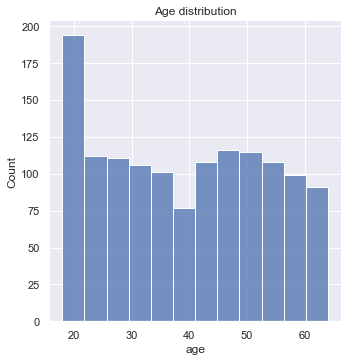

In [10]:
sns.set() # sns.set shows grids in the plot to get clear view .
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['age']) # distribution plot 
plt.title('Age distribution')
plt.show() # observation - there are a lot of people in the age group of 20 in our dataset 

<Figure size 576x576 with 0 Axes>

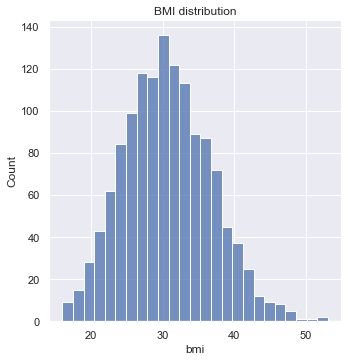

In [11]:
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['bmi']) 
plt.title('BMI distribution')
plt.show() # more or less normally distributed

<Figure size 576x576 with 0 Axes>

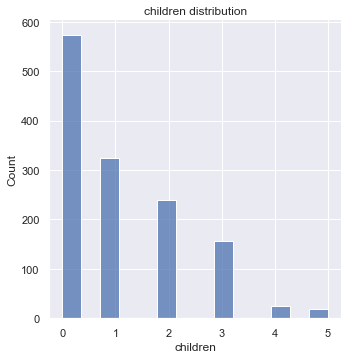

In [12]:
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['children']) 
plt.title('children distribution')
plt.show() 

In [13]:
# Now that  we have drawn the distribution plot for the non categorical features , 
# lets draw some plots for the categorcial features.Since its is not possible to draw distribution plots for them we use 
# count plot  provided by seaborn.


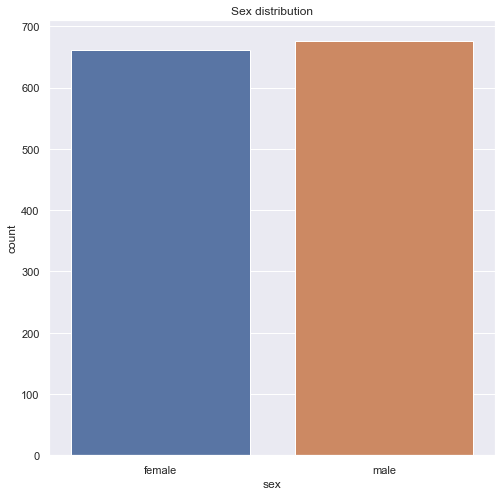

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex distribution')
plt.show()# we get more or less equal distribution of both men and women  in the dataset.

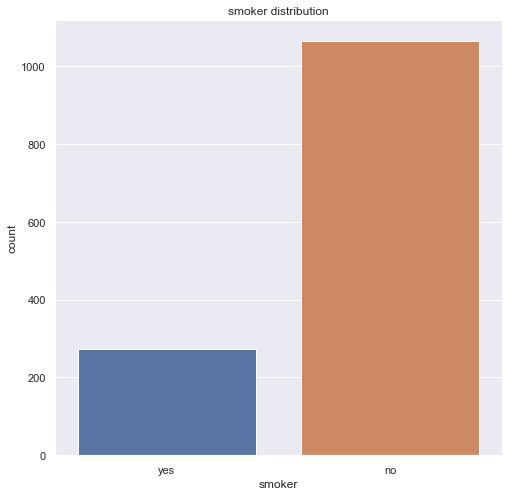

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

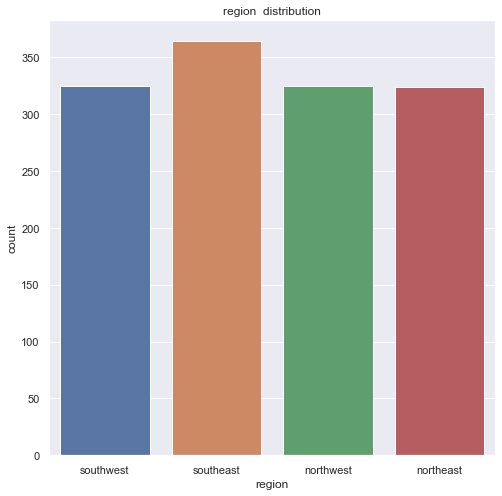

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region  distribution')
plt.show()

# Data preprocessing 

In [17]:
# Now its the time to convert the categorical features into some numerical format for the model to understand. 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
insurance_dataset['sex']=encoder.fit_transform(insurance_dataset['sex'])
# Another  simple way of doing the same
# insurance_dataset.replace({'sex':{'male':1 ,'female':0}},inplace=True)
print(insurance_dataset.head())

   age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520


In [18]:
insurance_dataset['smoker']=encoder.fit_transform(insurance_dataset['smoker'])
print(insurance_dataset.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [19]:
insurance_dataset_encoded=pd.get_dummies(insurance_dataset,columns=['region'])
# #Label encoding wont work here the feature is not ordinal. i.e the regions are not comparable like southwest>northeast etc. 
# so  we must give machine the full data in form of #vectors


In [20]:
insurance_dataset_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [21]:
insurance_dataset_encoded.drop(['region_southwest'],axis=1)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0
1334,18,0,31.920,0,0,2205.98080,1,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1
1336,21,0,25.800,0,0,2007.94500,0,0,0


In [22]:
# Now lets separate the dependent and independent variables
X=insurance_dataset_encoded.drop(columns=['charges'],axis=1)
Y=insurance_dataset_encoded['charges']

In [23]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [24]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Splitting the data into training and test data

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X_train.shape,X_test.shape)

(1070, 9) (268, 9)


In [29]:
#lets use linear regression now
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [30]:
training_predictions=regressor.predict(X_train)

In [31]:
#time to check our model efficieny .We will use r2 value
r2_train=metrics.r2_score(Y_train,training_predictions)

In [32]:
r2_train # the closer the value gets to 1 the better our model has performed

0.7520187377309014

In [34]:
# lets test the same on the test data
test_predictions=regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_predictions)

In [35]:
r2_test # the values are almost close to one another.

0.7449415564623686

In [36]:
regressor.coef_ # lets  also have a look at regression coefficients .

array([  251.22566407,   -37.12240075,   332.82271398,   587.9253102 ,
       23912.34523027,   527.72812674,   148.53816329,  -256.75623287,
        -419.51005716])

#  THANKS A LOT FOR YOUR PATIENCE.